# Importing all the libraries

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import re
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="https://www.goibibo.com/hotels/hotels-in-hyderabad-ct/"
response=requests.get(url)
print(requests.get(url,headers = {'User-Agent':'Mozilla/5.0'}))
soup=BeautifulSoup(response.text)

<Response [200]>


# Data collection

In [5]:
hname=[]
hlocation=[]
hratings=[]
htypes=[]
discount=[]
hprice=[]
htax=[]
reviews=[]
cities=["Manali","Hyderabad","Amritsar","Mumbai","Bangalore","Goa","Shimla","Udaipur","Tirupati","Munnar","Puri","Varanasi","Bhubaneswar","Jodhpur"]
for i in cities:
    
        url = f'https://www.goibibo.com/hotels/hotels-in-{i}-ct/'
        driver = webdriver.Chrome(r"C:\Users\HP\Downloads\chromedriver_win32 (2)\chromedriver.exe")
        driver.get(url)
        
        
        soup = BeautifulSoup(driver.page_source,'html.parser')
        driver.close()
        for i in soup.find_all("div",class_="HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-22 bwAcIn"):
            name=i.text

            if name is None:
                    hname.append(np.NaN)
            else:
                    hname.append(name)
        for i in soup.find_all("div",class_="HotelCardstyles__HotelInfoWrapperDiv-sc-1s80tyk-16 bvBKjN"):
            location=i.find("span",attrs={'type':'customLocation'})
            location=location.text
            regex=re.findall("in\s(.*)",location)

            if regex is None:
                    hlocation.append(np.nan)
            else:
                    hlocation.append(regex[0])
        container=soup.find_all("div",class_="HotelCardstyles__HotelInfoWrapperDiv-sc-1s80tyk-16 bvBKjN")
        for i in container:
            ratings=i.find("span",attrs={'itemprop':'ratingValue'})
            
            if ratings:
                    hratings.append(ratings.text)
            else:
                    hratings.append(np.nan)
        for i in soup.find_all("span",class_="HotelCardstyles__HotelTypeTag-sc-1s80tyk-21 jszfeY"):
            Type=i.text
            
            if Type is None:
                    htypes.append(np.NaN)
            else:
                    htypes.append(Type)
        for i in soup.find_all("p",class_="HotelCardstyles__CurrentPrice-sc-1s80tyk-40 cWpDmu"):
            price=i.text
            
            if price is None:
                    hprice.append(np.NaN)
            else:
                    hprice.append(price)
        for i in soup.find_all("span",class_="HotelCardstyles__TaxPriceTextWrapper-sc-1s80tyk-41 brnSez"):
            Tax=i.text

            regex=re.findall("₹\d+",Tax)

            if regex is None:
                    htax.append(np.nan)
            else:
                    htax.append(regex[0])
        container=soup.find_all("div",class_="HotelCardstyles__HotelPricingInfoWrapperDiv-sc-1s80tyk-29 hebbeS")
        
        for i in container:
            d=i.find("div",class_="OfferTagstyles__PercentageOffWrapperDiv-sc-16zl30v-12 eeUure")
            #print(d)
            if d:
                discount.append(d.text)
            else:
                discount.append(np.nan)
        container=soup.find_all("div",class_="HotelCardstyles__HotelInfoWrapperDiv-sc-1s80tyk-16 bvBKjN")
        
        for i in container:
            r=i.find("span",attrs={'itemprop':'ratingCount'})
            #print(d)
            if r:
                reviews.append(r.text)
            else:
                reviews.append(np.nan)
        

C:\Users\deept\AppData\Local\Temp\ipykernel_3532\1746868669.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\HP\Downloads\chromedriver_win32 (2)\chromedriver.exe")


# Checking lengths of all columns

In [36]:
len(hname)

420

In [37]:
len(hlocation)

420

In [38]:
len(hratings)

420

In [39]:
len(hprice)

420

In [40]:
len(htax)

420

In [41]:
len(discount)

420

In [42]:
len(reviews)

420

In [43]:
len(htypes)

420

# Creating a Dataframe

In [44]:
dic={"HotelName":hname,"Location":hlocation,"TypeOfHotel":htypes,"Price":hprice,"Tax":htax,"Discount":discount,"Ratings":hratings,"Reviews":reviews}
Hotel=pd.DataFrame(dic)
Hotel

,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105,₹509,32% Off,4.4/5,1888 Ratings
1,SAMIRU,Near Mall Road,Hotel,1886,₹457,NaN,4.2/5,243 Ratings
2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245,₹503,44% Off,4.3/5,113 Ratings
3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752,₹425,33% Off,4.1/5,197 Ratings
4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101,₹655,40% Off,3.9/5,1120 Ratings
...,...,...,...,...,...,...,...,...
415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660,₹370,38% Off,3.8/5,492 Ratings
416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599,₹311,NaN,3.9/5,2095 Ratings
417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379,₹285,60% Off,4/5,5 Ratings
418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207,₹274,52% Off,4.6/5,11 Ratings


# Data cleansing

In [45]:
Hotel["Ratings"]=Hotel["Ratings"].replace("/5","",regex=True)
Hotel["Tax"]=Hotel["Tax"].replace("₹","",regex=True)
Hotel["Discount"]=Hotel["Discount"].replace("% Off","",regex=True)
Hotel["Reviews"]=Hotel["Reviews"].replace("Ratings","",regex=True)

In [46]:
Hotel

,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105,509,32,4.4,1888
1,SAMIRU,Near Mall Road,Hotel,1886,457,NaN,4.2,243
2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245,503,44,4.3,113
3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752,425,33,4.1,197
4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101,655,40,3.9,1120
...,...,...,...,...,...,...,...,...
415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660,370,38,3.8,492
416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599,311,NaN,3.9,2095
417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379,285,60,4,5
418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207,274,52,4.6,11


# Changing the datatypes

In [47]:
Hotel.dtypes

HotelName      object
Location       object
TypeOfHotel    object
Price          object
Tax            object
Discount       object
Ratings        object
Reviews        object
dtype: object

In [48]:
Hotel["Price"]=Hotel["Price"].astype("int")
Hotel["Tax"]=Hotel["Tax"].astype("int")
Hotel["Discount"]=Hotel["Discount"].astype("float")
Hotel["Ratings"]=Hotel["Ratings"].astype("float")
Hotel["Reviews"]=Hotel["Reviews"].astype("float")

In [49]:
Hotel.dtypes

HotelName       object
Location        object
TypeOfHotel     object
Price            int32
Tax              int32
Discount       float64
Ratings        float64
Reviews        float64
dtype: object

# Filling nans

In [50]:
Hotel.isna().sum()

HotelName       0
Location        0
TypeOfHotel     0
Price           0
Tax             0
Discount       65
Ratings         1
Reviews         1
dtype: int64

In [51]:
Hotel["Ratings"]=Hotel["Ratings"].fillna(4)
Hotel["Reviews"]=Hotel["Reviews"].fillna(method="bfill")
Hotel["Discount"]=Hotel["Discount"].fillna(method="ffill")

In [52]:
Hotel.isna().sum()

HotelName      0
Location       0
TypeOfHotel    0
Price          0
Tax            0
Discount       0
Ratings        0
Reviews        0
dtype: int64

In [123]:
Hotel

,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews,Roomquality
0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105,509,32.0,4.4,1888.0,Excellent
1,SAMIRU,Near Mall Road,Hotel,1886,457,32.0,4.2,243.0,Excellent
2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245,503,44.0,4.3,113.0,Excellent
3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752,425,33.0,4.1,197.0,Excellent
4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101,655,40.0,3.9,1120.0,Good
...,...,...,...,...,...,...,...,...,...
415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660,370,38.0,3.8,492.0,Good
416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599,311,38.0,3.9,2095.0,Good
417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379,285,60.0,4.0,5.0,Excellent
418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207,274,52.0,4.6,11.0,Excellent


# Converting into csv file

In [54]:
Hotel.to_csv("Hotel.csv")
with open("Hotel.csv","r") as f:
    obj_r=csv.reader(f)
#     print(obj_r)
    for x in obj_r:
        print(x)

['', 'HotelName', 'Location', 'TypeOfHotel', 'Price', 'Tax', 'Discount', 'Ratings', 'Reviews']
['0', 'Thomas Villa, Hotel and Cottages', 'Rangri', 'Resort', '2105', '509', '32.0', '4.4', '1888.0']
['1', 'SAMIRU', 'Near Mall Road', 'Hotel', '1886', '457', '32.0', '4.2', '243.0']
['2', 'Gezellig Inn - Golden Apple | Cosy Rooms', 'Simsa', 'Homestay', '2245', '503', '44.0', '4.3', '113.0']
['3', 'goSTOPS Manali - Rooms & Dorms', 'Old Manali', 'Hostel', '1752', '425', '33.0', '4.1', '197.0']
['4', 'Hotel Mountain Top', 'Near Hadimba Temple', 'Hotel', '3101', '655', '40.0', '3.9', '1120.0']
['5', 'Sun Park Resort & Spa', 'Aleo', 'Resort', '3830', '814', '23.0', '4.2', '3627.0']
['6', 'Hotel Vikrant Inn @ Mall Road 100 Meters Walk', 'Near Mall Road', 'Hotel', '2180', '541', '41.0', '4.0', '31.0']
['7', 'Hotel Smuggler - Centrally Heated & Air Cooled', 'Dhungri Village', 'Hotel', '4616', '1139', '56.0', '4.6', '92.0']
['8', 'The Orchard Greens', 'Log Huts Area', 'Hotel', '5087', '1043', '7.0',

In [3]:
with open("Hotel.csv","r") as f:
    obj_r=csv.reader(f)

    for x in obj_r:
        print(x)

['', 'HotelName', 'Location', 'TypeOfHotel', 'Price', 'Tax', 'Discount', 'Ratings', 'Reviews']
['0', 'Thomas Villa, Hotel and Cottages', 'Rangri', 'Resort', '2105', '509', '32.0', '4.4', '1888.0']
['1', 'SAMIRU', 'Near Mall Road', 'Hotel', '1886', '457', '32.0', '4.2', '243.0']
['2', 'Gezellig Inn - Golden Apple | Cosy Rooms', 'Simsa', 'Homestay', '2245', '503', '44.0', '4.3', '113.0']
['3', 'goSTOPS Manali - Rooms & Dorms', 'Old Manali', 'Hostel', '1752', '425', '33.0', '4.1', '197.0']
['4', 'Hotel Mountain Top', 'Near Hadimba Temple', 'Hotel', '3101', '655', '40.0', '3.9', '1120.0']
['5', 'Sun Park Resort & Spa', 'Aleo', 'Resort', '3830', '814', '23.0', '4.2', '3627.0']
['6', 'Hotel Vikrant Inn @ Mall Road 100 Meters Walk', 'Near Mall Road', 'Hotel', '2180', '541', '41.0', '4.0', '31.0']
['7', 'Hotel Smuggler - Centrally Heated & Air Cooled', 'Dhungri Village', 'Hotel', '4616', '1139', '56.0', '4.6', '92.0']
['8', 'The Orchard Greens', 'Log Huts Area', 'Hotel', '5087', '1043', '7.0',

In [3]:
Hotel=pd.read_csv("Hotel.csv")

# Checking for duplicates

In [4]:
Hotel[Hotel.duplicated()]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


# Outliers detection

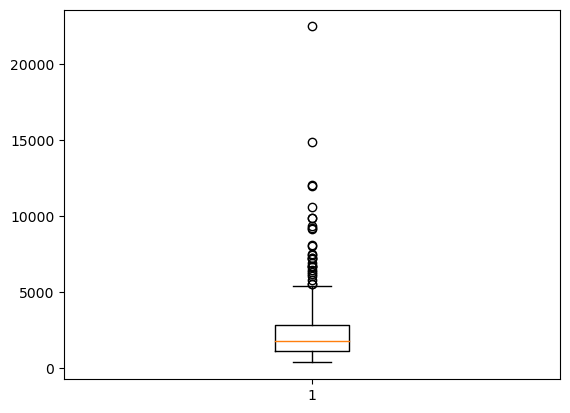

In [5]:
plt.boxplot(Hotel["Price"])
plt.show()

In [6]:
q1=Hotel["Price"].quantile(0.25)

In [7]:
q3=Hotel["Price"].quantile(0.75)

In [8]:
iqr=q3-q1

In [9]:
lower=q1-(1.5*iqr)

In [10]:
upper=q3+(1.5*iqr)

In [11]:
Hotel[Hotel["Price"]<lower]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [12]:
Hotel[Hotel["Price"]>upper]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
16,16,The Orchard Greens Resort,Log Huts Area,Resort,6442,1328,8.0,4.3,648.0
58,58,The Golkonda Hotel,Masab Tank,Hotel,7999,1439,20.0,4.1,1746.0
89,89,Hyatt Regency Amritsar,Maqbool Pura,Hotel,5500,660,26.0,4.0,706.0
116,116,Holiday Inn Mumbai International Airport,Near Mumbai Airport,Hotel,10579,1904,10.0,4.3,655.0
153,153,Sinon Baga Retreat - A Beach Resort,Baga,Resort,6706,1384,34.0,3.9,257.0
154,154,Shangri La Jungle Village,Anmod,Resort,6697,803,34.0,4.2,121.0
157,157,Cidade De Goa - IHCL SeleQtions,Vainguinim Beach,Resort,14900,2682,30.0,4.6,265.0
159,159,DoubleTree by Hilton Goa - Panaji,Panjim,Resort,11999,2159,22.0,4.4,154.0
160,160,HARD ROCK HOTEL GOA,Calangute,Resort,7399,2222,22.0,4.2,1564.0
161,161,"Taj Fort Aguada Resort & Spa, Goa",Candolim,Hotel,22500,4050,22.0,4.7,502.0


In [13]:
Hotel[(Hotel["Price"]<lower)|(Hotel["Price"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
16,16,The Orchard Greens Resort,Log Huts Area,Resort,6442,1328,8.0,4.3,648.0
58,58,The Golkonda Hotel,Masab Tank,Hotel,7999,1439,20.0,4.1,1746.0
89,89,Hyatt Regency Amritsar,Maqbool Pura,Hotel,5500,660,26.0,4.0,706.0
116,116,Holiday Inn Mumbai International Airport,Near Mumbai Airport,Hotel,10579,1904,10.0,4.3,655.0
153,153,Sinon Baga Retreat - A Beach Resort,Baga,Resort,6706,1384,34.0,3.9,257.0
154,154,Shangri La Jungle Village,Anmod,Resort,6697,803,34.0,4.2,121.0
157,157,Cidade De Goa - IHCL SeleQtions,Vainguinim Beach,Resort,14900,2682,30.0,4.6,265.0
159,159,DoubleTree by Hilton Goa - Panaji,Panjim,Resort,11999,2159,22.0,4.4,154.0
160,160,HARD ROCK HOTEL GOA,Calangute,Resort,7399,2222,22.0,4.2,1564.0
161,161,"Taj Fort Aguada Resort & Spa, Goa",Candolim,Hotel,22500,4050,22.0,4.7,502.0


In [14]:
Hotel["Price"]=Hotel["Price"].map(lambda x:lower if x<lower else upper if x>upper else x)

In [15]:
Hotel["Price"]

0      2105.0
1      1886.0
2      2245.0
3      1752.0
4      3101.0
        ...  
415    1660.0
416    2599.0
417    1379.0
418    1207.0
419    1809.0
Name: Price, Length: 420, dtype: float64

In [16]:
Hotel[(Hotel["Price"]<lower)|(Hotel["Price"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [17]:
#Tax

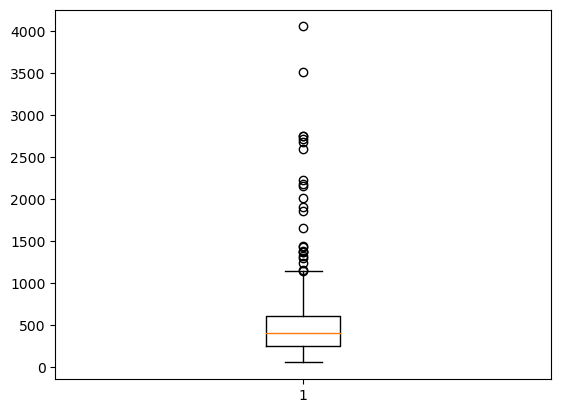

In [18]:
plt.boxplot(Hotel["Tax"])
plt.show()

In [19]:
Hotel["Tax"].describe()

count     420.000000
mean      520.876190
std       470.563856
min        59.000000
25%       252.750000
50%       410.000000
75%       609.500000
max      4050.000000
Name: Tax, dtype: float64

In [20]:
q1=Hotel["Tax"].quantile(0.25)

In [21]:
q1

252.75

In [22]:
q3=Hotel["Tax"].quantile(0.75)

In [23]:
q3

609.5

In [24]:
lower=q1-(1.5*iqr)

In [25]:
lower

-2350.5

In [26]:
upper=q3+(1.5*iqr)

In [27]:
upper

3212.75

In [28]:
Hotel[Hotel["Tax"]<lower]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [29]:
Hotel[Hotel["Tax"]>upper]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
161,161,"Taj Fort Aguada Resort & Spa, Goa",Candolim,Hotel,5428.75,4050,22.0,4.7,502.0
290,290,The Panoramic Getaway,Chithirapuram,Hotel,5428.75,3504,24.0,4.7,243.0


In [30]:
Q1=Hotel["Tax"].quantile(0.25)

In [31]:
Q3=Hotel["Tax"].quantile(0.75)

In [32]:
IQR=Q3-Q1

In [33]:
low=Q1-(1.5*IQR)

In [34]:
low

-282.375

In [35]:
up=Q3+(1.5*IQR)

In [36]:
up

1144.625

In [37]:
Hotel[Hotel["Tax"]<low]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [38]:
Hotel[Hotel["Tax"]>up]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
16,16,The Orchard Greens Resort,Log Huts Area,Resort,5428.75,1328,8.0,4.3,648.0
49,49,The Park Hyderabad,Somajiguda,Hotel,5191.00,1157,40.0,3.6,7411.0
58,58,The Golkonda Hotel,Masab Tank,Hotel,5428.75,1439,20.0,4.1,1746.0
116,116,Holiday Inn Mumbai International Airport,Near Mumbai Airport,Hotel,5428.75,1904,10.0,4.3,655.0
153,153,Sinon Baga Retreat - A Beach Resort,Baga,Resort,5428.75,1384,34.0,3.9,257.0
157,157,Cidade De Goa - IHCL SeleQtions,Vainguinim Beach,Resort,5428.75,2682,30.0,4.6,265.0
159,159,DoubleTree by Hilton Goa - Panaji,Panjim,Resort,5428.75,2159,22.0,4.4,154.0
160,160,HARD ROCK HOTEL GOA,Calangute,Resort,5428.75,2222,22.0,4.2,1564.0
161,161,"Taj Fort Aguada Resort & Spa, Goa",Candolim,Hotel,5428.75,4050,22.0,4.7,502.0
163,163,The Park Baga River Goa (Adults only Property),Baga,Resort,4772.00,1148,7.0,4.1,477.0


In [39]:
Hotel[(Hotel["Tax"]<low)|(Hotel["Tax"]>up)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
16,16,The Orchard Greens Resort,Log Huts Area,Resort,5428.75,1328,8.0,4.3,648.0
49,49,The Park Hyderabad,Somajiguda,Hotel,5191.00,1157,40.0,3.6,7411.0
58,58,The Golkonda Hotel,Masab Tank,Hotel,5428.75,1439,20.0,4.1,1746.0
116,116,Holiday Inn Mumbai International Airport,Near Mumbai Airport,Hotel,5428.75,1904,10.0,4.3,655.0
153,153,Sinon Baga Retreat - A Beach Resort,Baga,Resort,5428.75,1384,34.0,3.9,257.0
157,157,Cidade De Goa - IHCL SeleQtions,Vainguinim Beach,Resort,5428.75,2682,30.0,4.6,265.0
159,159,DoubleTree by Hilton Goa - Panaji,Panjim,Resort,5428.75,2159,22.0,4.4,154.0
160,160,HARD ROCK HOTEL GOA,Calangute,Resort,5428.75,2222,22.0,4.2,1564.0
161,161,"Taj Fort Aguada Resort & Spa, Goa",Candolim,Hotel,5428.75,4050,22.0,4.7,502.0
163,163,The Park Baga River Goa (Adults only Property),Baga,Resort,4772.00,1148,7.0,4.1,477.0


In [40]:
Hotel["Tax"]

0      509
1      457
2      503
3      425
4      655
      ... 
415    370
416    311
417    285
418    274
419    466
Name: Tax, Length: 420, dtype: int64

In [41]:
Hotel["Tax"]=Hotel["Tax"].apply(lambda x:low if x<low else up if x>up else x)

In [42]:
Hotel["Tax"]

0      509.0
1      457.0
2      503.0
3      425.0
4      655.0
       ...  
415    370.0
416    311.0
417    285.0
418    274.0
419    466.0
Name: Tax, Length: 420, dtype: float64

In [43]:
Hotel[ (Hotel["Tax"] < low) | (Hotel["Tax"]>up) ]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [44]:
#Discount

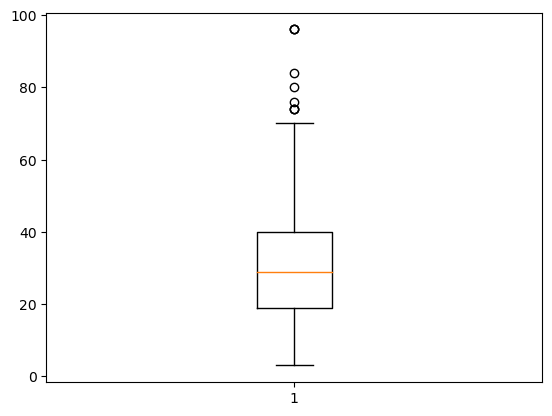

In [45]:
plt.boxplot(Hotel["Discount"])
plt.show()

In [46]:
Hotel["Discount"].describe()

count    420.000000
mean      31.423810
std       16.095224
min        3.000000
25%       19.000000
50%       29.000000
75%       40.000000
max       96.000000
Name: Discount, dtype: float64

In [47]:
q1=Hotel["Discount"].quantile(0.25)

In [48]:
q3=Hotel["Discount"].quantile(0.75)

In [49]:
iqr=q3-q1

In [50]:
lower=q1-(1.5*iqr)

In [51]:
lower

-12.5

In [52]:
upper=q3+(1.5*iqr)

In [53]:
upper

71.5

In [54]:
Hotel["Discount"].describe()

count    420.000000
mean      31.423810
std       16.095224
min        3.000000
25%       19.000000
50%       29.000000
75%       40.000000
max       96.000000
Name: Discount, dtype: float64

In [55]:
Hotel[Hotel["Discount"]<lower]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [56]:
Hotel[Hotel["Discount"]>upper]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
33,33,The Landmark Banjara Hills,Banjara Hills,Hotel,2052.0,497.000,74.0,4.0,313.0
67,67,Hotel Sukhman International,Queens Road,Hotel,683.0,169.000,74.0,3.5,4134.0
212,212,Hotel Meenakshi Udaipur,Central Area,Hotel,764.0,185.000,96.0,3.9,1300.0
213,213,"Le ROI, Udaipur @Udaipur City Railway Station",StationNear Udaipur Train StationNear Near Uda...,Hotel,1233.0,291.000,96.0,3.9,3411.0
214,214,Hotel Vishnupriya,Near Lake Pichola,Hotel,5373.0,1144.625,96.0,4.1,2441.0
300,300,Hotel Kalinga,Golden Beach,Hotel,1062.0,88.000,76.0,4.1,2999.0
301,301,"La Platina Premium Suites, Near Sea Beach",Baliapanda,Apartment,1663.0,419.000,80.0,4.5,1318.0
308,308,"La Platina, Near Sea Beach",Baliapanda,Apartment,1386.0,349.000,84.0,4.4,1300.0
315,315,Kakkson Inn,Baliapanda,Hotel,644.0,237.000,74.0,3.5,491.0


In [57]:
Hotel[(Hotel["Discount"]<lower)|(Hotel["Discount"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
33,33,The Landmark Banjara Hills,Banjara Hills,Hotel,2052.0,497.000,74.0,4.0,313.0
67,67,Hotel Sukhman International,Queens Road,Hotel,683.0,169.000,74.0,3.5,4134.0
212,212,Hotel Meenakshi Udaipur,Central Area,Hotel,764.0,185.000,96.0,3.9,1300.0
213,213,"Le ROI, Udaipur @Udaipur City Railway Station",StationNear Udaipur Train StationNear Near Uda...,Hotel,1233.0,291.000,96.0,3.9,3411.0
214,214,Hotel Vishnupriya,Near Lake Pichola,Hotel,5373.0,1144.625,96.0,4.1,2441.0
300,300,Hotel Kalinga,Golden Beach,Hotel,1062.0,88.000,76.0,4.1,2999.0
301,301,"La Platina Premium Suites, Near Sea Beach",Baliapanda,Apartment,1663.0,419.000,80.0,4.5,1318.0
308,308,"La Platina, Near Sea Beach",Baliapanda,Apartment,1386.0,349.000,84.0,4.4,1300.0
315,315,Kakkson Inn,Baliapanda,Hotel,644.0,237.000,74.0,3.5,491.0


In [58]:
Hotel["Discount"]=Hotel["Discount"].map(lambda x:lower if x<lower else upper if x>upper else x)

In [59]:
Hotel["Discount"]

0      32.0
1      32.0
2      44.0
3      33.0
4      40.0
       ... 
415    38.0
416    38.0
417    60.0
418    52.0
419    29.0
Name: Discount, Length: 420, dtype: float64

In [60]:
Hotel[(Hotel["Discount"]<lower)|(Hotel["Discount"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [61]:
#Ratings

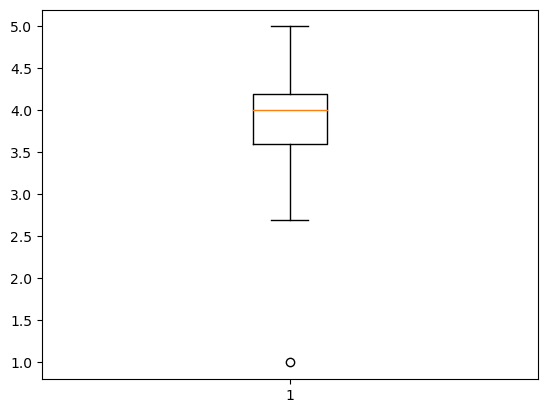

In [62]:
plt.boxplot(Hotel["Ratings"])
plt.show()

In [63]:
Hotel["Ratings"]

0      4.4
1      4.2
2      4.3
3      4.1
4      3.9
      ... 
415    3.8
416    3.9
417    4.0
418    4.6
419    4.1
Name: Ratings, Length: 420, dtype: float64

In [64]:
m=Hotel["Ratings"].mean()

In [65]:
s=Hotel["Ratings"].std()

In [66]:
lower=m-(3*s)

In [67]:
upper=m+(3*s)

In [68]:
Hotel[Hotel["Ratings"]<lower]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
409,409,OYO Mahadev Hotel,Basni,Hotel,1263.0,94.0,35.0,1.0,4.0


In [69]:
Hotel[Hotel["Ratings"]>upper]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [70]:
Hotel[(Hotel["Ratings"]<lower) | (Hotel["Ratings"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
409,409,OYO Mahadev Hotel,Basni,Hotel,1263.0,94.0,35.0,1.0,4.0


In [71]:
Hotel["Ratings"]=Hotel["Ratings"].map(lambda x:lower if x<lower else upper if x>upper else x)

In [72]:
Hotel

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
0,0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105.0,509.0,32.0,4.4,1888.0
1,1,SAMIRU,Near Mall Road,Hotel,1886.0,457.0,32.0,4.2,243.0
2,2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245.0,503.0,44.0,4.3,113.0
3,3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752.0,425.0,33.0,4.1,197.0
4,4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101.0,655.0,40.0,3.9,1120.0
...,...,...,...,...,...,...,...,...,...
415,415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660.0,370.0,38.0,3.8,492.0
416,416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599.0,311.0,38.0,3.9,2095.0
417,417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379.0,285.0,60.0,4.0,5.0
418,418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207.0,274.0,52.0,4.6,11.0


In [73]:
Hotel[(Hotel["Ratings"]<lower) | (Hotel["Ratings"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [74]:
#Reviews

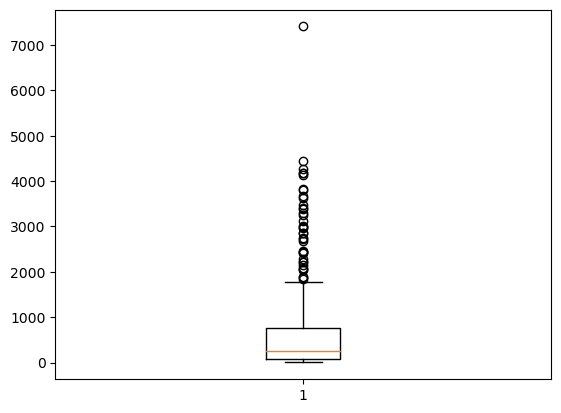

In [75]:
plt.boxplot(Hotel["Reviews"])
plt.show()

In [76]:
Hotel["Reviews"].describe()

count     420.000000
mean      626.347619
std       927.376677
min         1.000000
25%        69.500000
50%       257.000000
75%       753.750000
max      7411.000000
Name: Reviews, dtype: float64

In [77]:
m=Hotel["Reviews"].mean()

In [78]:
s=Hotel["Reviews"].std()

In [79]:
m

626.347619047619

In [80]:
s

927.3766773993697

In [81]:
lower=m-(3*s)

In [82]:
lower

-2155.78241315049

In [83]:
upper=m+(3*s)

In [84]:
upper

3408.477651245728

In [85]:
Hotel[Hotel["Reviews"]<lower]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [86]:
Hotel[Hotel["Reviews"]>upper]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
5,5,Sun Park Resort & Spa,Aleo,Resort,3830.0,814.000,23.0,4.2,3627.0
30,30,Hotel Imperial Classic,Himayat Nagar,Hotel,1128.0,275.000,22.0,4.0,3483.0
31,31,THE CENT,Lakdikapul,Hotel,1764.0,447.000,29.0,3.6,3671.0
49,49,The Park Hyderabad,Somajiguda,Hotel,5191.0,1144.625,40.0,3.6,7411.0
67,67,Hotel Sukhman International,Queens Road,Hotel,683.0,169.000,71.5,3.5,4134.0
123,123,The Signature Inn,StationNear Bangalore Train StationNear Near B...,Hotel,650.0,152.000,38.0,4.0,4269.0
213,213,"Le ROI, Udaipur @Udaipur City Railway Station",StationNear Udaipur Train StationNear Near Uda...,Hotel,1233.0,291.000,71.5,3.9,3411.0
245,245,Hotel Sahasra Residency,Near Tirupati Temple,Hotel,661.0,150.000,17.0,3.8,3803.0
324,324,Kakkson Villa,Baliapanda,Hotel,839.0,293.000,70.0,3.8,4183.0
325,325,Hotel Pushpa (Berries Group of Hotels),Golden Beach,Hotel,1379.0,415.000,64.0,3.6,3830.0


In [87]:
Hotel[(Hotel["Reviews"]<lower) | (Hotel["Reviews"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
5,5,Sun Park Resort & Spa,Aleo,Resort,3830.0,814.000,23.0,4.2,3627.0
30,30,Hotel Imperial Classic,Himayat Nagar,Hotel,1128.0,275.000,22.0,4.0,3483.0
31,31,THE CENT,Lakdikapul,Hotel,1764.0,447.000,29.0,3.6,3671.0
49,49,The Park Hyderabad,Somajiguda,Hotel,5191.0,1144.625,40.0,3.6,7411.0
67,67,Hotel Sukhman International,Queens Road,Hotel,683.0,169.000,71.5,3.5,4134.0
123,123,The Signature Inn,StationNear Bangalore Train StationNear Near B...,Hotel,650.0,152.000,38.0,4.0,4269.0
213,213,"Le ROI, Udaipur @Udaipur City Railway Station",StationNear Udaipur Train StationNear Near Uda...,Hotel,1233.0,291.000,71.5,3.9,3411.0
245,245,Hotel Sahasra Residency,Near Tirupati Temple,Hotel,661.0,150.000,17.0,3.8,3803.0
324,324,Kakkson Villa,Baliapanda,Hotel,839.0,293.000,70.0,3.8,4183.0
325,325,Hotel Pushpa (Berries Group of Hotels),Golden Beach,Hotel,1379.0,415.000,64.0,3.6,3830.0


In [88]:
Hotel["Reviews"]=Hotel["Reviews"].map(lambda x:lower if x<lower else upper if x>upper else x)

In [89]:
Hotel

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
0,0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105.0,509.0,32.0,4.4,1888.0
1,1,SAMIRU,Near Mall Road,Hotel,1886.0,457.0,32.0,4.2,243.0
2,2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245.0,503.0,44.0,4.3,113.0
3,3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752.0,425.0,33.0,4.1,197.0
4,4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101.0,655.0,40.0,3.9,1120.0
...,...,...,...,...,...,...,...,...,...
415,415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660.0,370.0,38.0,3.8,492.0
416,416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599.0,311.0,38.0,3.9,2095.0
417,417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379.0,285.0,60.0,4.0,5.0
418,418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207.0,274.0,52.0,4.6,11.0


In [90]:
Hotel[(Hotel["Reviews"]<lower) | (Hotel["Reviews"]>upper)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews


In [91]:
Hotel

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews
0,0,"Thomas Villa, Hotel and Cottages",Rangri,Resort,2105.0,509.0,32.0,4.4,1888.0
1,1,SAMIRU,Near Mall Road,Hotel,1886.0,457.0,32.0,4.2,243.0
2,2,Gezellig Inn - Golden Apple | Cosy Rooms,Simsa,Homestay,2245.0,503.0,44.0,4.3,113.0
3,3,goSTOPS Manali - Rooms & Dorms,Old Manali,Hostel,1752.0,425.0,33.0,4.1,197.0
4,4,Hotel Mountain Top,Near Hadimba Temple,Hotel,3101.0,655.0,40.0,3.9,1120.0
...,...,...,...,...,...,...,...,...,...
415,415,"Treehouse Raj Bagh, A Boutique Heritage Hotel",Chaukhan,Hotel,1660.0,370.0,38.0,3.8,492.0
416,416,Lords Inn Jodhpur,Near Jodhpur Airport,Hotel,2599.0,311.0,38.0,3.9,2095.0
417,417,Treebo Trend Hinduja Mehrangarh Fort,Lawaran,Hotel,1379.0,285.0,60.0,4.0,5.0
418,418,Raj Mandir Boutique Home Stay,Sodagaran Mohalla,Homestay,1207.0,274.0,52.0,4.6,11.0


### Adding additional column with roomquality

In [3]:
Hotel["Roomquality"]="Excellent"
Hotel.loc[Hotel['Ratings']<4.0,'Roomquality']='Good'
Hotel.loc[Hotel['Ratings']<3.5,'Roomquality']='Average'
Hotel.loc[Hotel['Ratings']==3.0,'Roomquality']='fair'
Hotel.loc[Hotel['Ratings']<2.5,'Roomquality']='poor'

# Data Visualisation

## Univariate

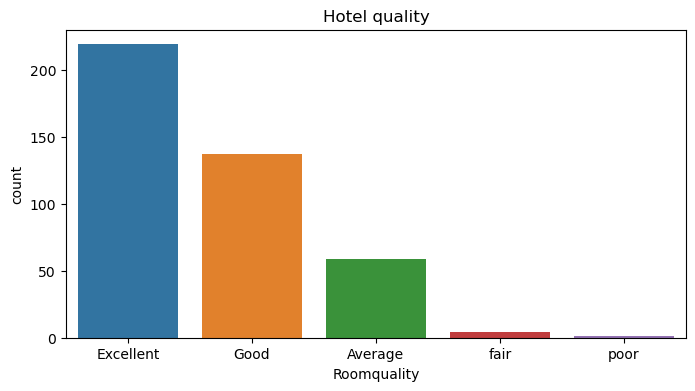

In [14]:
size = (8,4)
fig, ax = plt.subplots(figsize=size)
plt.title('Hotel quality')
sns.countplot(data=Hotel, x=Hotel['Roomquality'])
plt.show()

- The above chart describes Hotels counts with same and highest price.
- The first highest hotels with same price are 4 with the price 1497.
- And other four are:

     - 2nd-3 hotels with 1090
     - 3rd-3 hotels with 1663
     - 4th-3 hotels with 1379
     - 5th-2 hotels with 1128                
                     
                     
     

# Checking discount for all dataset

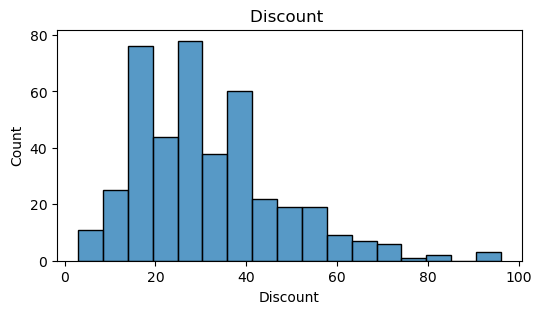

In [20]:
size = (6, 3)
fig, ax = plt.subplots(figsize=size)
plt.title('Discount ')
sns.histplot(data=Hotel,x=Hotel['Discount'])
plt.show()

- By observing the above data we can say that there are maximum hotels providing 30% discount

# Searching for the maximum ratings of the hotels

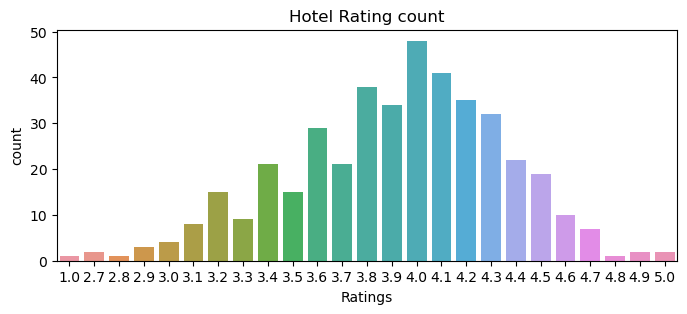

In [18]:
size = (8,3)
fig, ax = plt.subplots(figsize=size)
plt.title('Hotel Rating count')
sns.countplot(data=Hotel, x=Hotel['Ratings'])
plt.show()

- By observing the above data we can say that maximum hotels are having 4.0 ratings
- And the least ratings are 1.0,2.8 and 4.8

### Checking for most preferred hotel types

Hotel        302
Resort        36
Homestay      30
Hostel        22
Apartment     14
Name: TypeOfHotel, dtype: int64

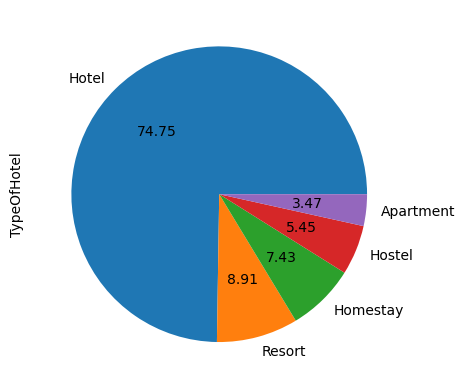

In [139]:
Hotel["TypeOfHotel"].value_counts()[:5].plot(kind='pie',autopct='%.2f')
Hotel["TypeOfHotel"].value_counts()[:5]

- The most preferred Hoteltype is hotels because they may be more luxurous
- The least preferred are Dharmashala ,tree house and camp

# Chceking the maximum tax 

C:\Users\ deept\OneDrive\Desktop\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tax', ylabel='Density'>

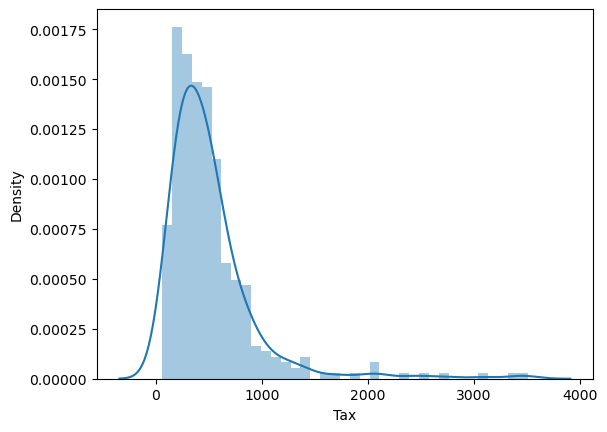

In [79]:
sns.distplot(Hotel["Tax"])

- Maximum tax is between 0 to 500
- Highest tax is approx 3500
- minimum tax is beteen 1000 to 3000

# Bi-variate

### Categorical and numerical

### Roomquality v/s Price


C:\Users\ deept\OneDrive\Desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Roomquality v/s Price')

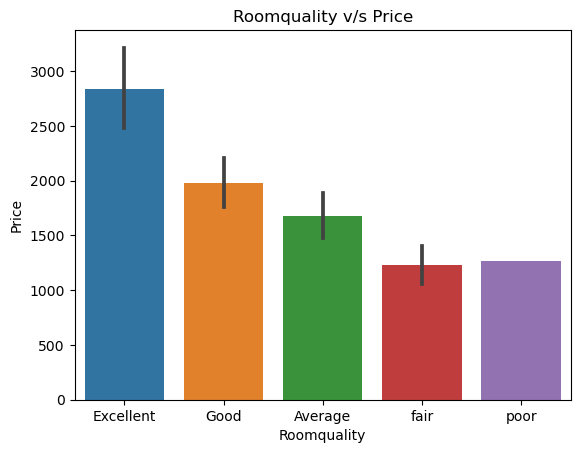

In [21]:
sns.barplot(Hotel["Roomquality"],Hotel["Price"])
plt.title('Roomquality v/s Price')

- By observing the above graph we can easily say that the hotels which are having excellent quality are high in price.
- The hotels with fair and poor quality are almost having the same price.
- With average room quality we can observe that they are getting with average price.

### Roomquality v/s Reviews

C:\Users\ deept\OneDrive\Desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Roomquality v/s Reviews')

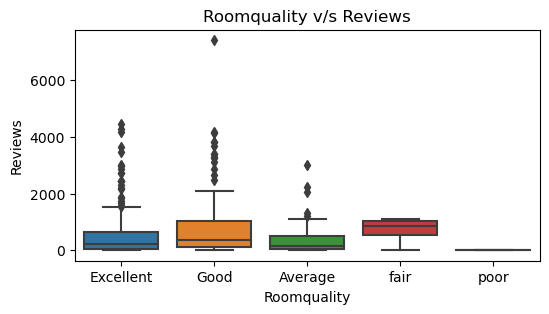

In [24]:
size = (6, 3)
fig, ax = plt.subplots(figsize=size)
sns.boxplot(Hotel["Roomquality"],Hotel["Reviews"])
plt.title('Roomquality v/s Reviews')

- According to the room quality the rooms with "Good" are having highest reviews.
- And the lowest reviews are for "Poor"

# numerical to numerical

C:\Users\ deept\OneDrive\Desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price v\\s Tax')

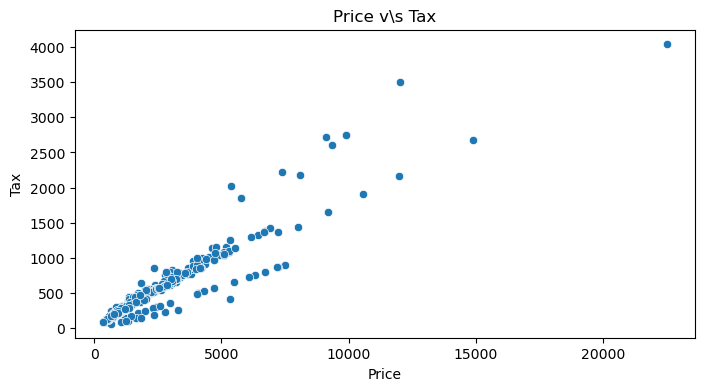

In [29]:
size = (8, 4)
fig, ax = plt.subplots(figsize=size)
sns.scatterplot(Hotel["Price"],Hotel["Tax"])
plt.title("Price v\s Tax")

- As the points move from left to right, this indicates a positive relationship between "price" and "Tax". As the PRICE increase, the TAX tend to increase.

# groupby

Text(0.5, 1.0, 'Price vs Ratings ')

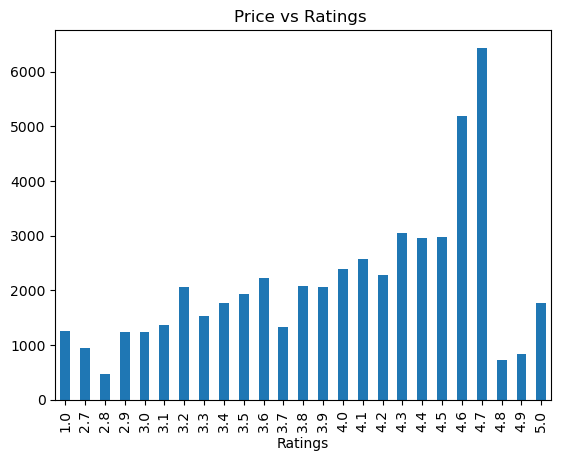

In [33]:
(Hotel.groupby("Ratings").mean()["Price"]).plot(kind='bar')
plt.title('Price vs Ratings ')

* By observing the above graph we can say that:
    - The highest tax is for Resorts.
    - The lowest tax is for Dharmashala.
    - Average tax,we can say appoximately 520.
    

# categorical to categorical

<AxesSubplot:>

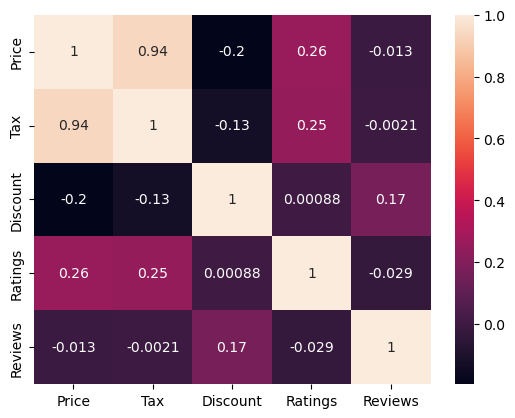

In [140]:
sns.heatmap(Hotel.corr(),annot=True)

- Heatmap helps us to describe the relation between any two categorical columns.
 - Above heatmap shows the relation bw Typeofhotel and Roomquality.
 - From above heatmap Hotels are having excellent quality as dharmashala and tree house are having less quality

# numerical numerical-multivariant

<AxesSubplot:xlabel='Price', ylabel='Tax'>

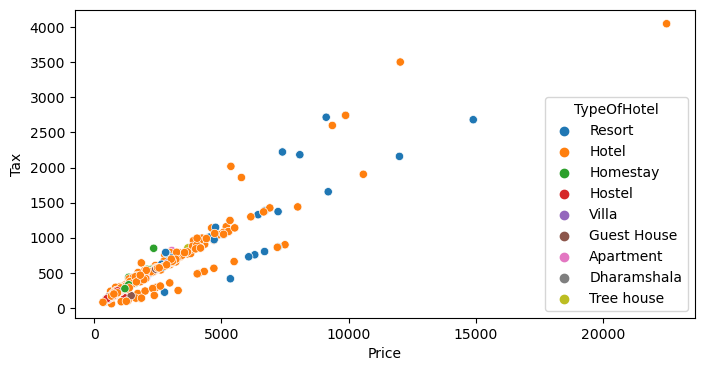

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Price", y="Tax", data = Hotel, hue="TypeOfHotel")

- As the points move from left to right, this indicates a positive relationship between "price" and "Tax". 
- As the PRICE increase, the TAX tend to increase.

<AxesSubplot:xlabel='Roomquality', ylabel='Price'>

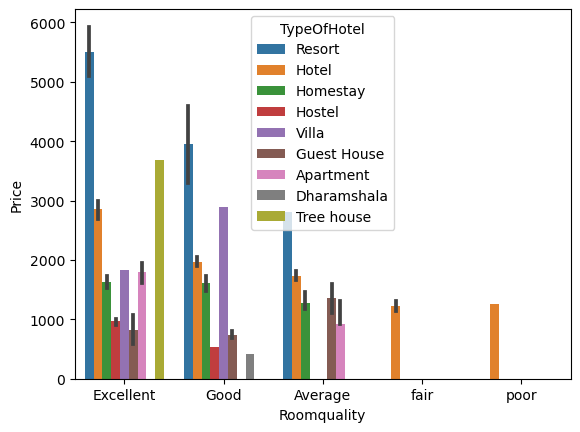

In [127]:
sns.barplot(x = Hotel["Roomquality"], y = Hotel["Price"], hue = Hotel["TypeOfHotel"],data=Hotel,ci = 50)

- There is almost all hotels types are having excellent roomquality except darmashala.
- Hotels which are having least prices are having poor and fair room quality.

# Pairplot

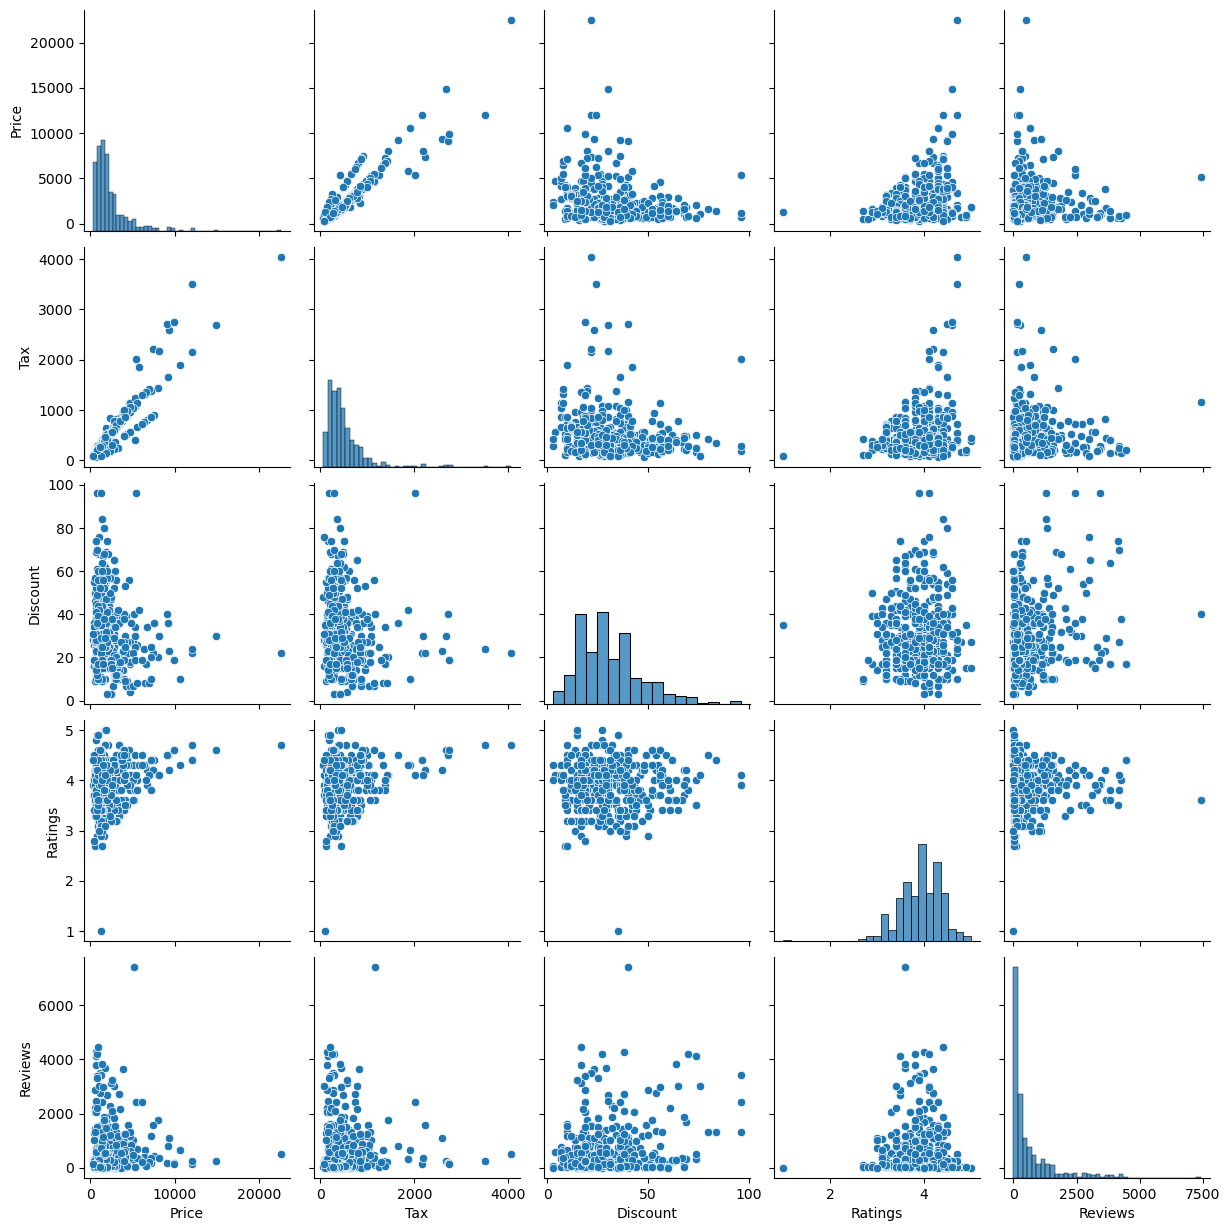

In [122]:
sns.pairplot(Hotel)

- To plot multiple pairwise bivariate distributions in a dataset,we use the .pairplot() function. 
-  The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row    and in the x-axis across a single column. That creates plots as shown below.

# Scenario

In [36]:
Hotel.nlargest(5,'Discount')

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews,Roomquality
212,212,Hotel Meenakshi Udaipur,Central Area,Hotel,764,185,96.0,3.9,1300.0,Good
213,213,"Le ROI, Udaipur @Udaipur City Railway Station",StationNear Udaipur Train StationNear Near Uda...,Hotel,1233,291,96.0,3.9,3411.0,Good
214,214,Hotel Vishnupriya,Near Lake Pichola,Hotel,5373,2017,96.0,4.1,2441.0,Excellent
308,308,"La Platina, Near Sea Beach",Baliapanda,Apartment,1386,349,84.0,4.4,1300.0,Excellent
301,301,"La Platina Premium Suites, Near Sea Beach",Baliapanda,Apartment,1663,419,80.0,4.5,1318.0,Excellent


-To find the hotels with highest discount.

In [17]:
Hotel[(Hotel["Price"]<1000)&(Hotel["Roomquality"]=='Excellent')].head(5)

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews,Roomquality
10,10,Mad Monkeyss Manali,Near Hadimba Temple,Hostel,730,175,27.0,4.8,8.0,Excellent
21,21,Robinhood Travel Hostel,Naggar,Hostel,764,171,15.0,4.9,10.0,Excellent
65,65,Osahan Paradise,Near Golden Temple,Homestay,659,155,27.0,4.3,94.0,Excellent
70,70,goSTOPS Amritsar Chatiwind Gate - Rooms & Dorms,Pratap Nagar,Hostel,970,235,33.0,4.5,363.0,Excellent
76,76,DM B&B Homestay,Near Golden Temple,Homestay,479,110,26.0,4.0,204.0,Excellent


 - When we wanted to find the hotels with excellent quality under 1000.


In [37]:
Hotel[(Hotel["Ratings"]==5.0)]

,Unnamed: 0,HotelName,Location,TypeOfHotel,Price,Tax,Discount,Ratings,Reviews,Roomquality
197,197,Shimla Vibes Bed N Breakfast,Tutikandi,Homestay,1703,380,15.0,5.0,2.0,Excellent
287,287,Babys Villa Homestays,Kunchithanny,Homestay,1830,443,27.0,5.0,1.0,Excellent


- To find the hotels with 5.0 ratings.